In [1]:
#import assumptions file so that we can get function descriptions as well as work
from assumptions import *
import assumptions

This notebook is used in concert with the assumptions.py module found [here](https://github.com/Corey4005/SCANAnalysis/blob/main/SCAN-scripts/assumptions.py). 

The purpose of this notebook is to show how I cleaned SCAN site data from all 18 stations across Alabama. First, I will show some plots on correlations between soil moisture anomalies at SCAN and Evaporative Stress Index via Atmospheric Land Exchange Inverse Model (ALEXI). Then, I will show some statistics on the USDA SCAN data encompasing varying years and locations. 

First, lets look at the various functions that exist in the assumptions.py module and my written documetation. 

In [2]:
help(assumptions)

Help on module assumptions:

NAME
    assumptions

DESCRIPTION
    Project: 
        This is a project for calculating effective saturation at
        USDA SCAN sites given soil class and assumptions about the physical 
        characteristics for each. 
    
    Created on Wed Jan 26 11:41:36 2022
    
    @author: coreywalker
    contact: 
        cdw0063@uah.edu
        
    note: 
        Please site this repository if the functions are used in another analysis.

CLASSES
    builtins.object
        SCAN
    
    class SCAN(builtins.object)
     |  SCAN(data)
     |  
     |  SCAN CLASS - used to set Alabama SCAN sites with assumed soil 
     |  characteristics based on soil classes. 
     |  
     |  Class functions: 
     |      
     |      __init__ - create new_df attribute used in functions set on 
     |          SCAN_READ variable (raw import) in assumptions.py. 
     |      
     |      soil_class - append the soil dictionary for each station that has an
     |          avai



The data cleaned as outliers are in the following dataframe:


                   Too High  Too Low
two-in-cleaned          562        3
four-in-cleaned         393       12
eight-in-cleaned       1112       12
twenty-in-cleaned      1003       23
forty-in-cleaned        340       30


Total values > 100% volumetric soil moisture cleaned: 14
Here are the columns to sort by: Index(['ANOM_2in_rescale', 'ANOM_4in_rescale', 'ANOM_8in_rescale',
       'ANOM_20in_rescale', 'ANOM_40in_rescale', 'Latitude', 'Longitude',
       'mean_corr'],
      dtype='object')
Which column would you like to sort? Enter Here:mean_corr


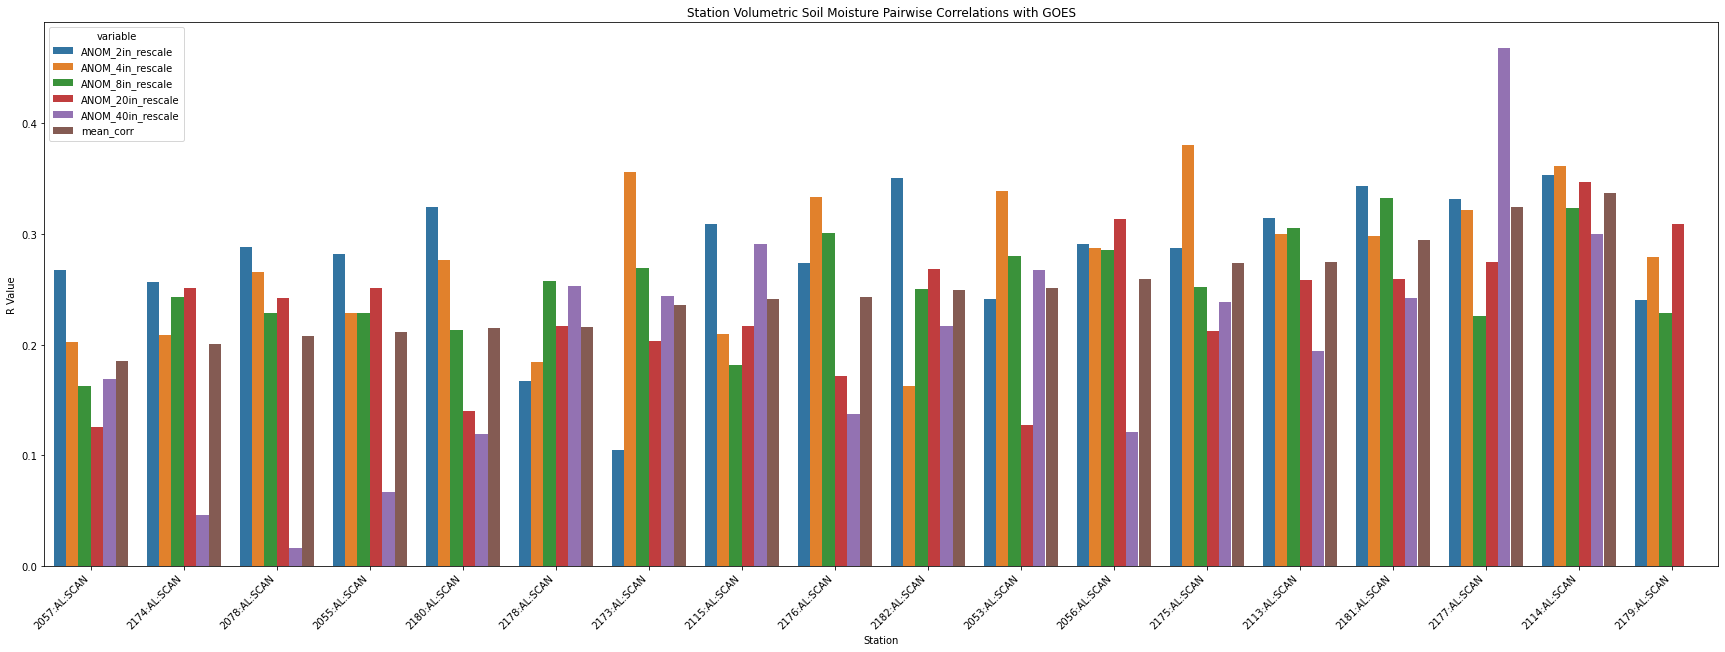

In [3]:
#this is an example of current ALEXI vs USDA soil moisture correlation plots (with some error that needs correction)
ALL_FUNCS_BARPLOT(std=3.5)

In [4]:
#lets look at some statistics for the data without it being cleaned. 
I = SCAN(data=SCAN_READ)
#calculate standard deviations for the data and show z_scores 
z_scores = I.standard_deviation().z_score().show()
z_scores

,station,SMS-2.0in_x,SMS-4.0in_x,SMS-8.0in_x,2in-stdev,4in-stdev,8in-stdev,20in-stdev,40in-stdev,SMS-20.0in_x,SMS-40.0in_x,z_2,z_4,z_8,z_20,z_40
Date,,,,,,,,,,,,,,,,
2002-04-24,2057:AL:SCAN,14.7,12.7,16.6,8.144560,7.490000,6.587845,3.464113,4.472051,33.8,35.1,-1.467985,-2.278574,-2.494430,-1.711842,-1.322982
2002-04-25,2057:AL:SCAN,14.5,11.8,16.0,8.144560,7.490000,6.587845,3.464113,4.472051,NaN,34.9,-1.492541,-2.398734,-2.585507,NaN,-1.367704
2002-04-26,2057:AL:SCAN,13.5,11.6,15.4,8.144560,7.490000,6.587845,3.464113,4.472051,34.4,34.9,-1.615322,-2.425436,-2.676584,-1.538638,-1.367704
2002-04-27,2057:AL:SCAN,13.2,11.5,15.5,8.144560,7.490000,6.587845,3.464113,4.472051,33.8,34.9,-1.652157,-2.438788,-2.661405,-1.711842,-1.367704
2002-04-28,2057:AL:SCAN,13.5,11.5,15.0,8.144560,7.490000,6.587845,3.464113,4.472051,32.5,34.6,-1.615322,-2.438788,-2.737302,-2.087119,-1.434788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,2053:AL:SCAN,NaN,38.3,40.3,5.066812,2.676614,5.916890,8.670479,1.195494,40.6,40.9,NaN,2.283736,2.286793,1.399660,3.676263
2021-03-28,2053:AL:SCAN,NaN,38.3,40.3,5.066812,2.676614,5.916890,8.670479,1.195494,40.6,40.9,NaN,2.283736,2.286793,1.399660,3.676263
2021-03-29,2053:AL:SCAN,NaN,38.6,40.4,5.066812,2.676614,5.916890,8.670479,1.195494,40.6,40.9,NaN,2.395818,2.303693,1.399660,3.676263


In [5]:
def group_z_score(df, column=None):
    new_col = []
    for i in df[column]:
        if i > 3.5:
            word = 'Too High'
            new_col.append(word)
        elif i < -3.5:
            word = 'Too Low'
            new_col.append(word)
        else:
            word = 'Good Data'
            new_col.append(word)
            
    return new_col

In [6]:
#two inch value counts
z_scores['2in_group'] = group_z_score(z_scores, column='z_2')
z_scores['2in_group'].value_counts()

Good Data    78658
Too High       562
Too Low          3
Name: 2in_group, dtype: int64

In [7]:
#four inch value counts
z_scores['4in_group'] = group_z_score(z_scores, column='z_4')
z_scores['4in_group'].value_counts()

Good Data    78818
Too High       393
Too Low         12
Name: 4in_group, dtype: int64

In [8]:
#eight inch data
z_scores['8in_group'] = group_z_score(z_scores, column='z_8')
z_scores['8in_group'].value_counts()

Good Data    78099
Too High      1112
Too Low         12
Name: 8in_group, dtype: int64

In [9]:
#twenty inch data
z_scores['20in_group'] = group_z_score(z_scores, column='z_20')
z_scores['20in_group'].value_counts()

Good Data    78197
Too High      1003
Too Low         23
Name: 20in_group, dtype: int64

In [10]:
#forty inch data
z_scores['40in_group'] = group_z_score(z_scores, column='z_40')
z_scores['40in_group'].value_counts()

Good Data    78853
Too High       340
Too Low         30
Name: 40in_group, dtype: int64

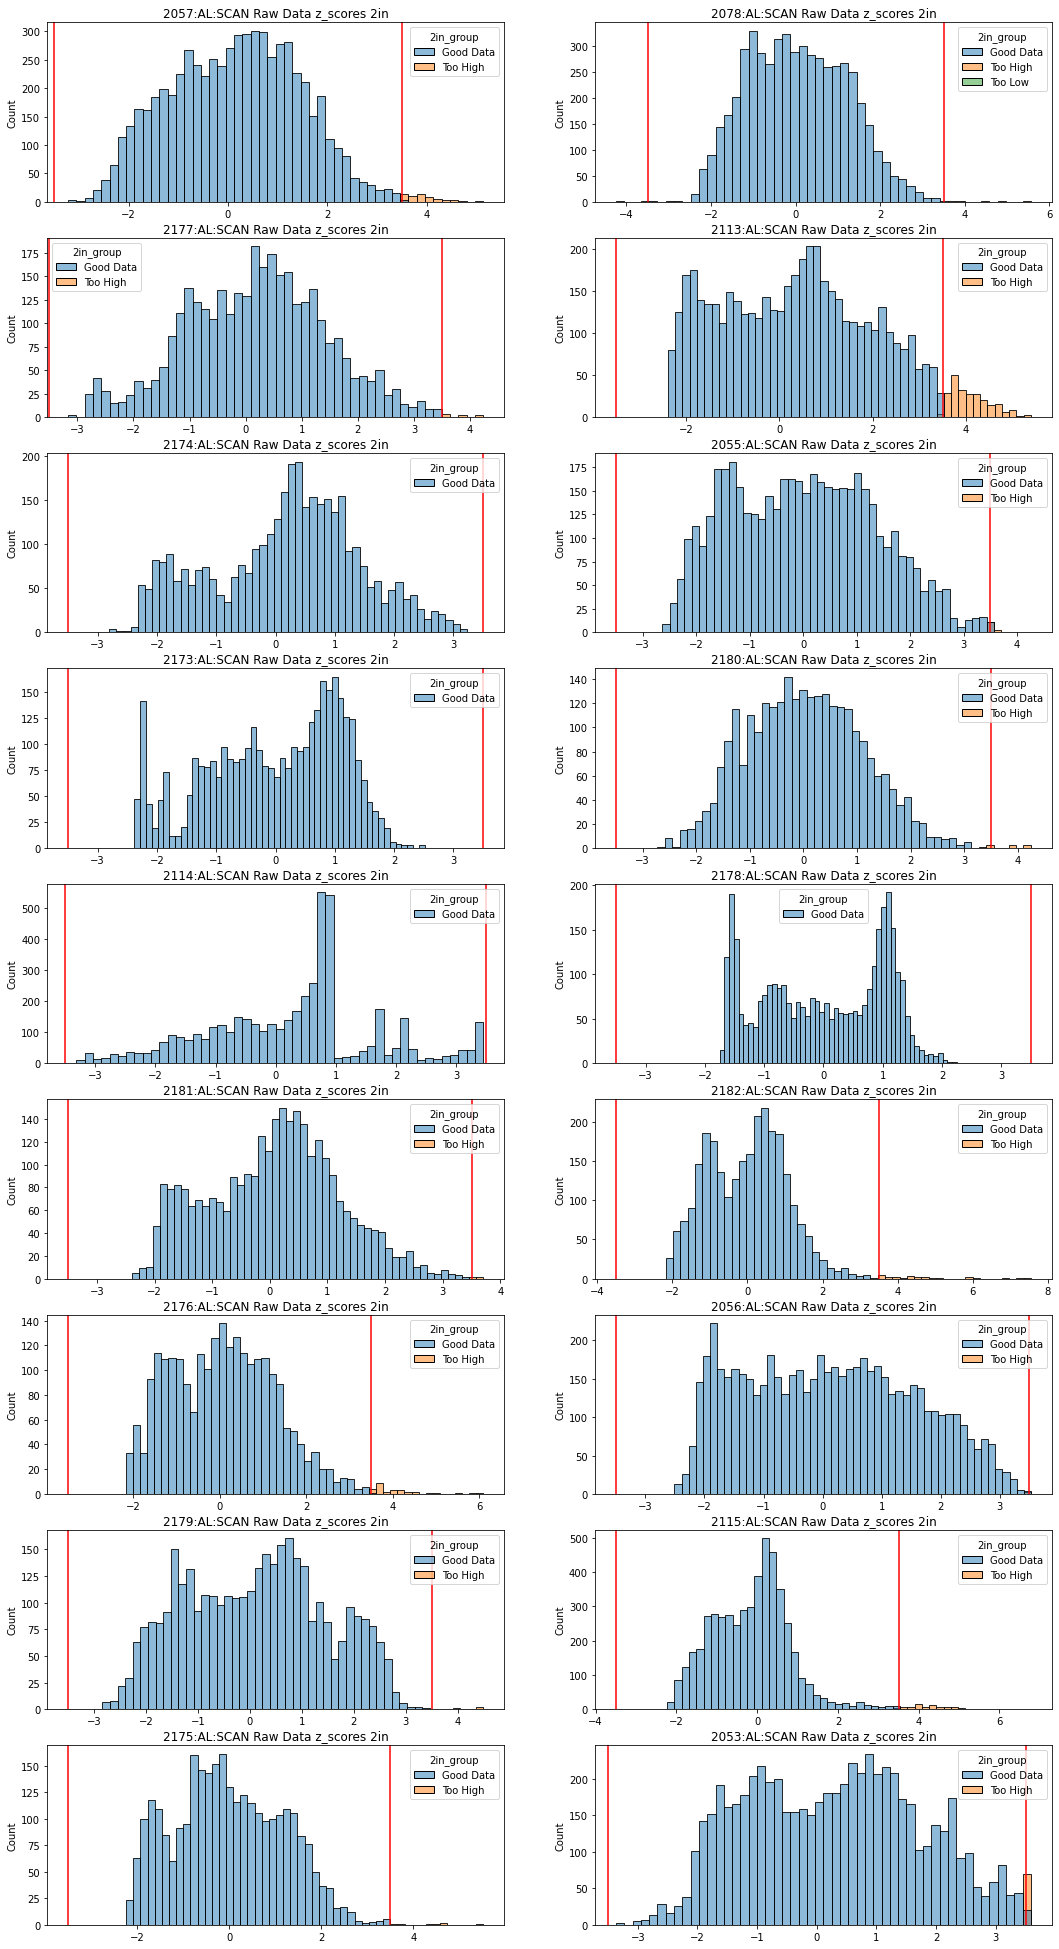

In [11]:
#two in histograms
fig, ax = plt.subplots(9, 2, figsize=(18,35))
ax_array = ax.ravel()
for idx, key in enumerate(z_scores['station'].unique()):
    df = z_scores[z_scores['station'] == key]
    df.sort_index(inplace=True)
    zs = df[['z_2','2in_group']]
    plot = sns.histplot(data=zs, x='z_2', ax=ax_array[idx], bins=50, hue='2in_group', legend=True)
    plot.set(xlabel=None)
    plot.set_title(f'{key}' + ' ' + 'Raw Data z_scores 2in')
    plot.axvline(x=3.5, color='red')
    plot.axvline(x=-3.5, color='red')

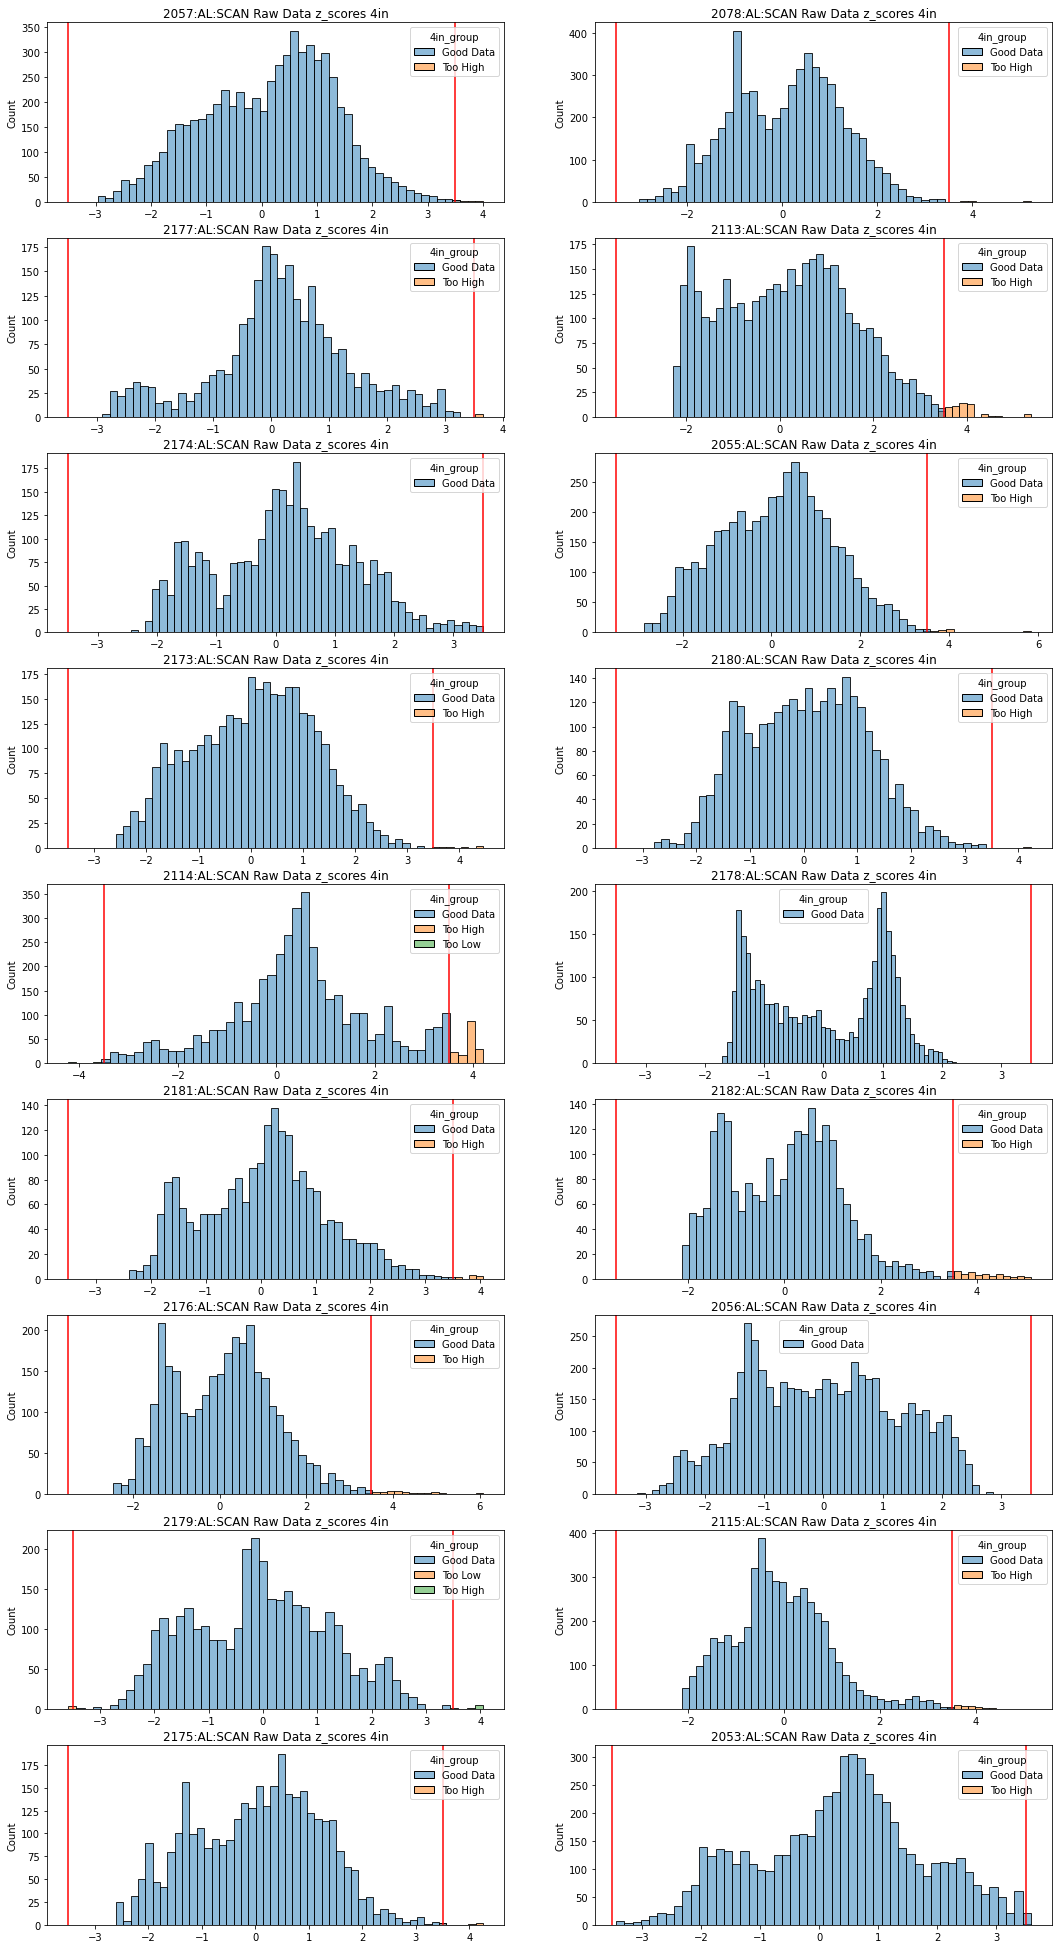

In [12]:
#four in histograms
fig, ax = plt.subplots(9, 2, figsize=(18,35))
ax_array = ax.ravel()
for idx, key in enumerate(z_scores['station'].unique()):
    df = z_scores[z_scores['station'] == key]
    df.sort_index(inplace=True)
    zs = df[['z_4','4in_group']]
    plot = sns.histplot(data=zs, x='z_4', ax=ax_array[idx], bins=50, hue='4in_group', legend=True)
    plot.set(xlabel=None)
    plot.set_title(f'{key}' + ' ' + 'Raw Data z_scores 4in')
    plot.axvline(x=3.5, color='red')
    plot.axvline(x=-3.5, color='red')

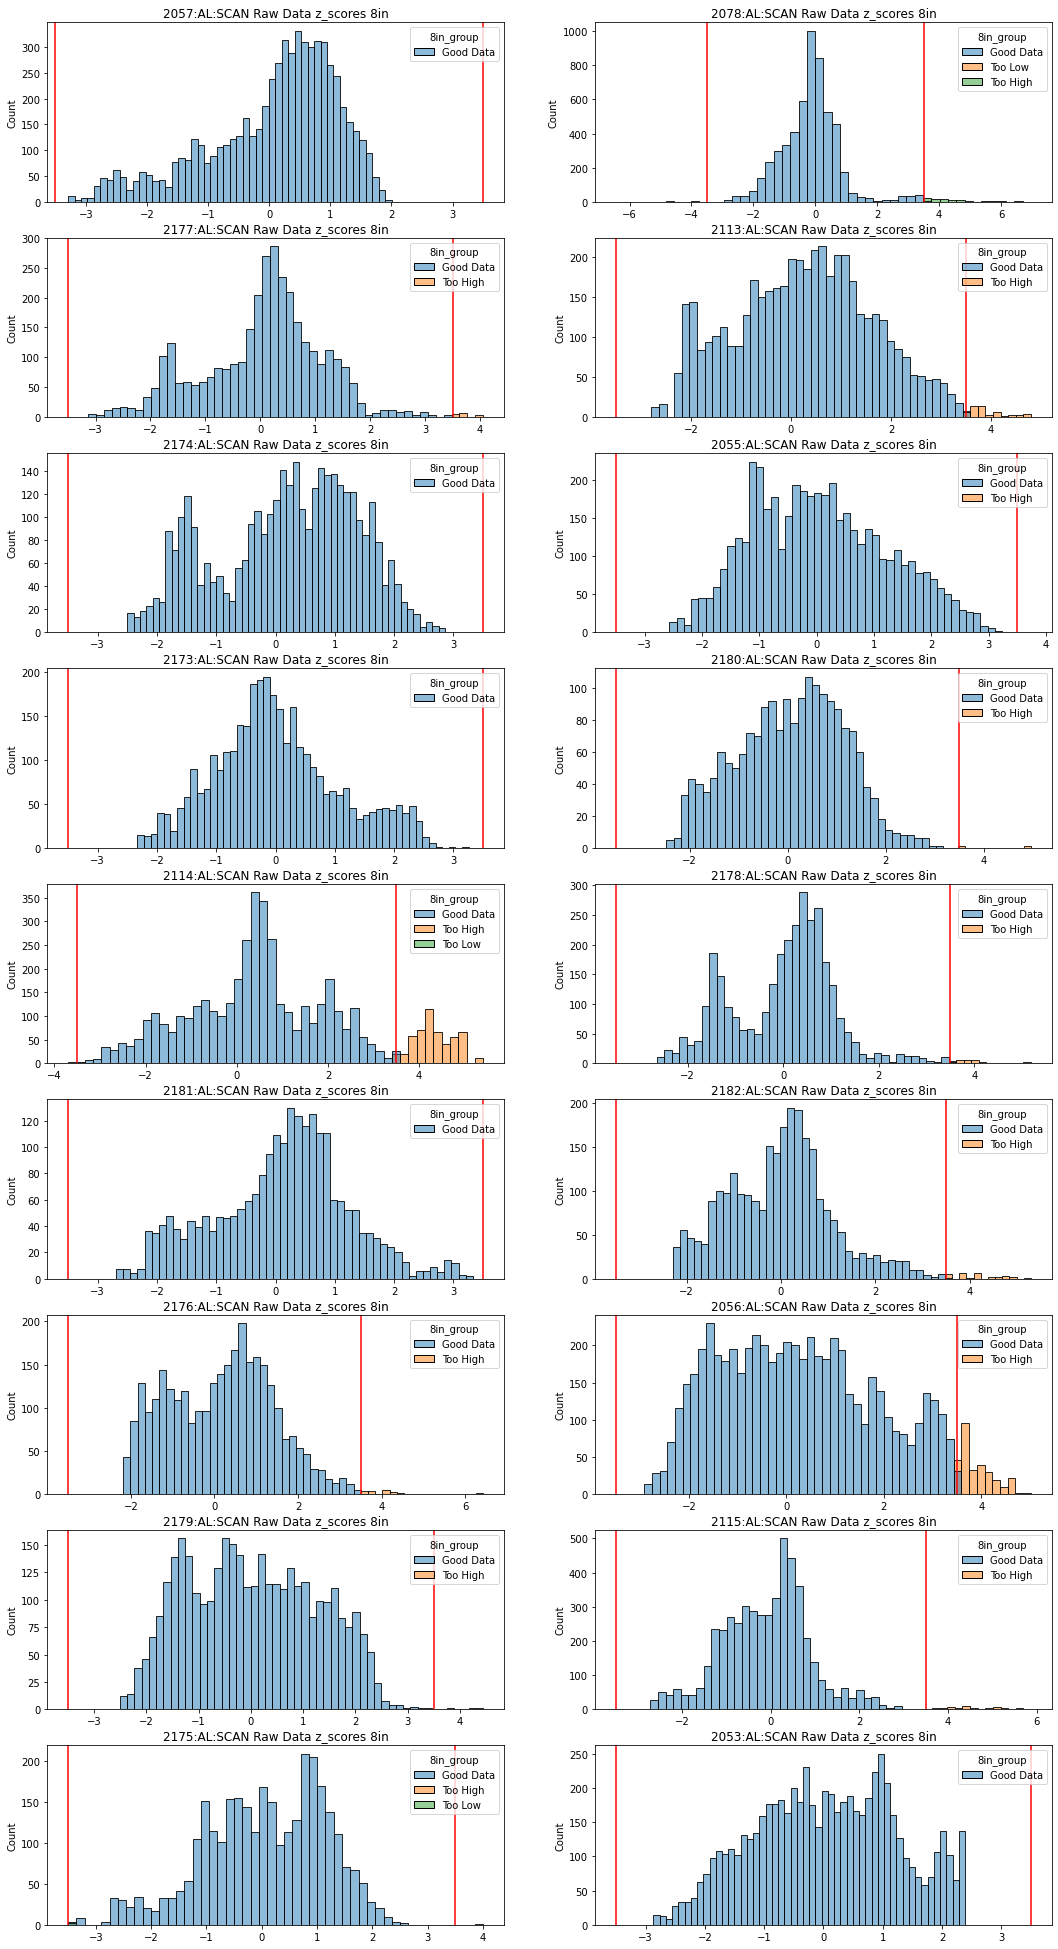

In [13]:
#eight in histograms
fig, ax = plt.subplots(9, 2, figsize=(18,35))
ax_array = ax.ravel()
for idx, key in enumerate(z_scores['station'].unique()):
    df = z_scores[z_scores['station'] == key]
    df.sort_index(inplace=True)
    zs = df[['z_8', '8in_group']]
    plot = sns.histplot(data=zs, x='z_8', ax=ax_array[idx], bins=50, hue='8in_group', legend=True)
    plot.set(xlabel=None)
    plot.set_title(f'{key}' + ' ' + 'Raw Data z_scores 8in')
    plot.axvline(x=3.5, color='red')
    plot.axvline(x=-3.5, color='red')

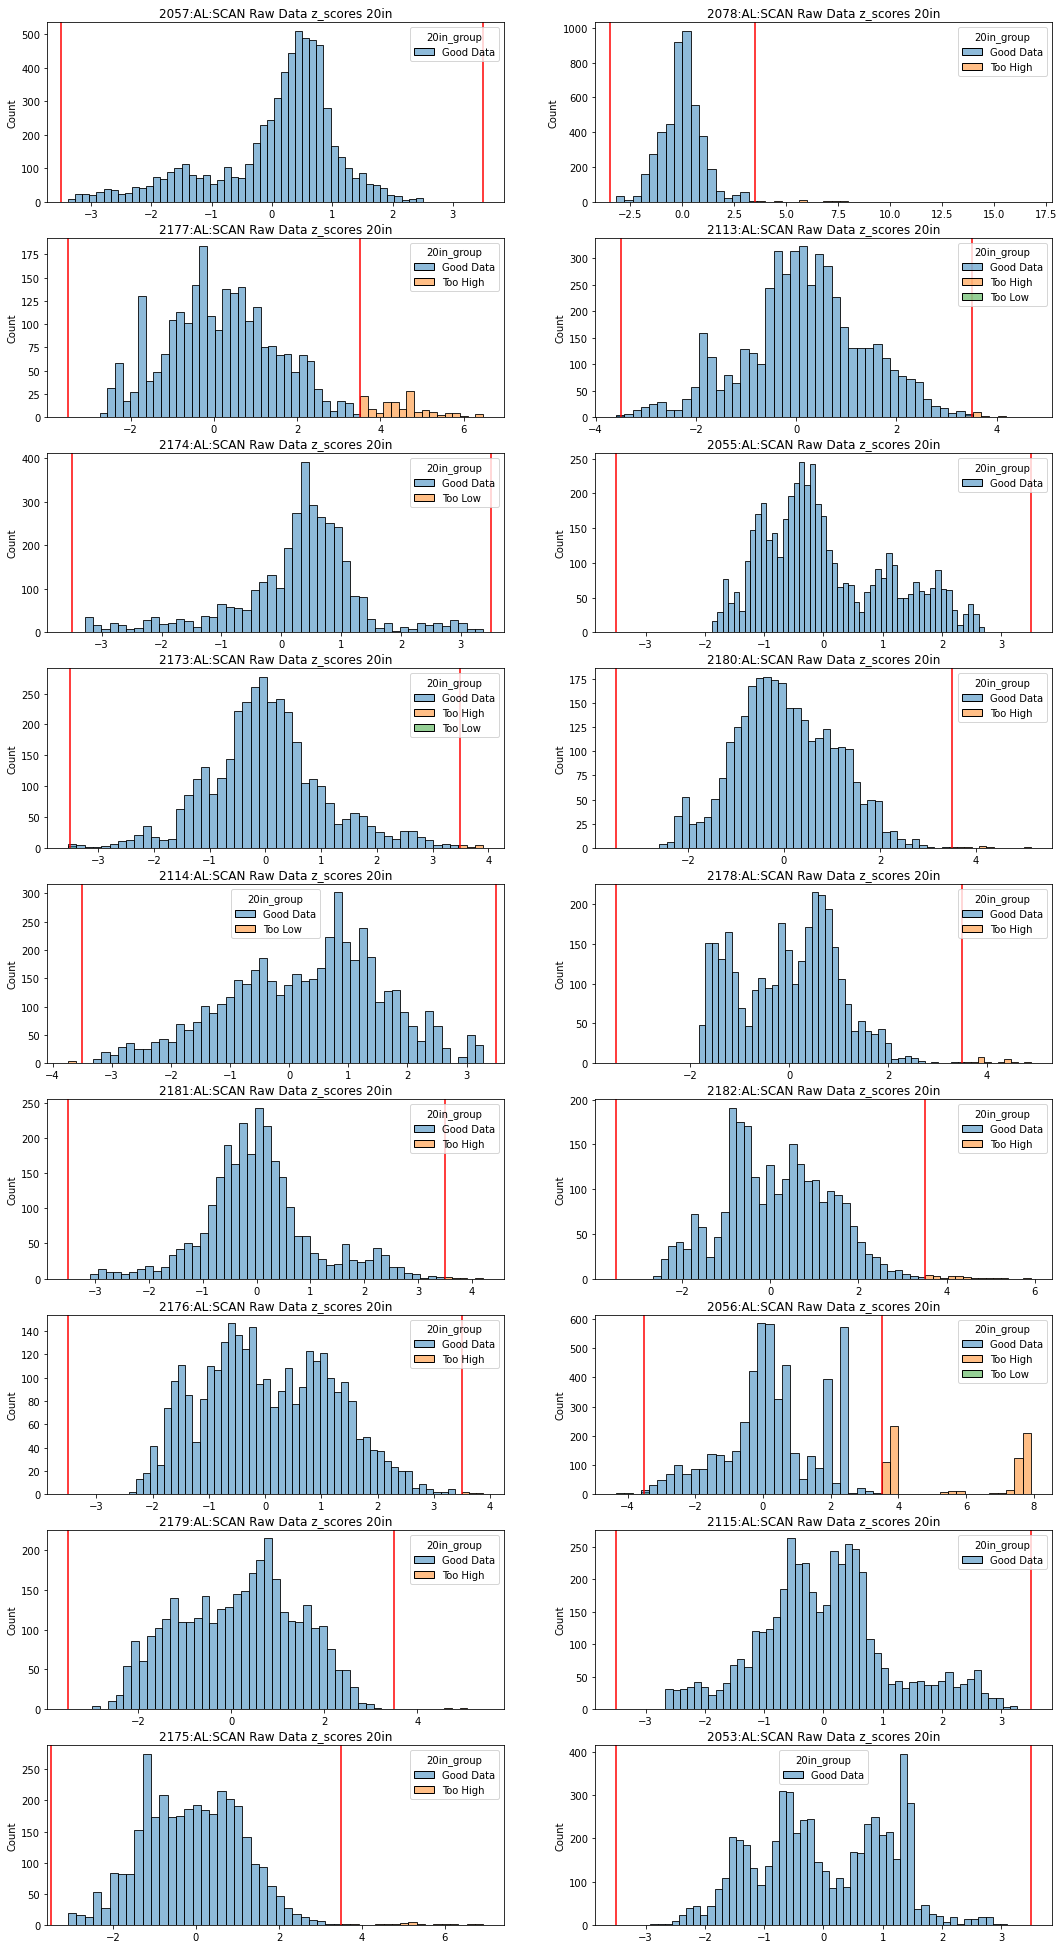

In [14]:
#twenty in histograms
fig, ax = plt.subplots(9, 2, figsize=(18,35))
ax_array = ax.ravel()
for idx, key in enumerate(z_scores['station'].unique()):
    df = z_scores[z_scores['station'] == key]
    df.sort_index(inplace=True)
    zs = df[['z_20', '20in_group']]
    plot = sns.histplot(data=zs, x='z_20', ax=ax_array[idx], bins=50, hue='20in_group', legend=True)
    plot.set(xlabel=None)
    plot.set_title(f'{key}' + ' ' + 'Raw Data z_scores 20in')
    plot.axvline(x=3.5, color='red')
    plot.axvline(x=-3.5, color='red')

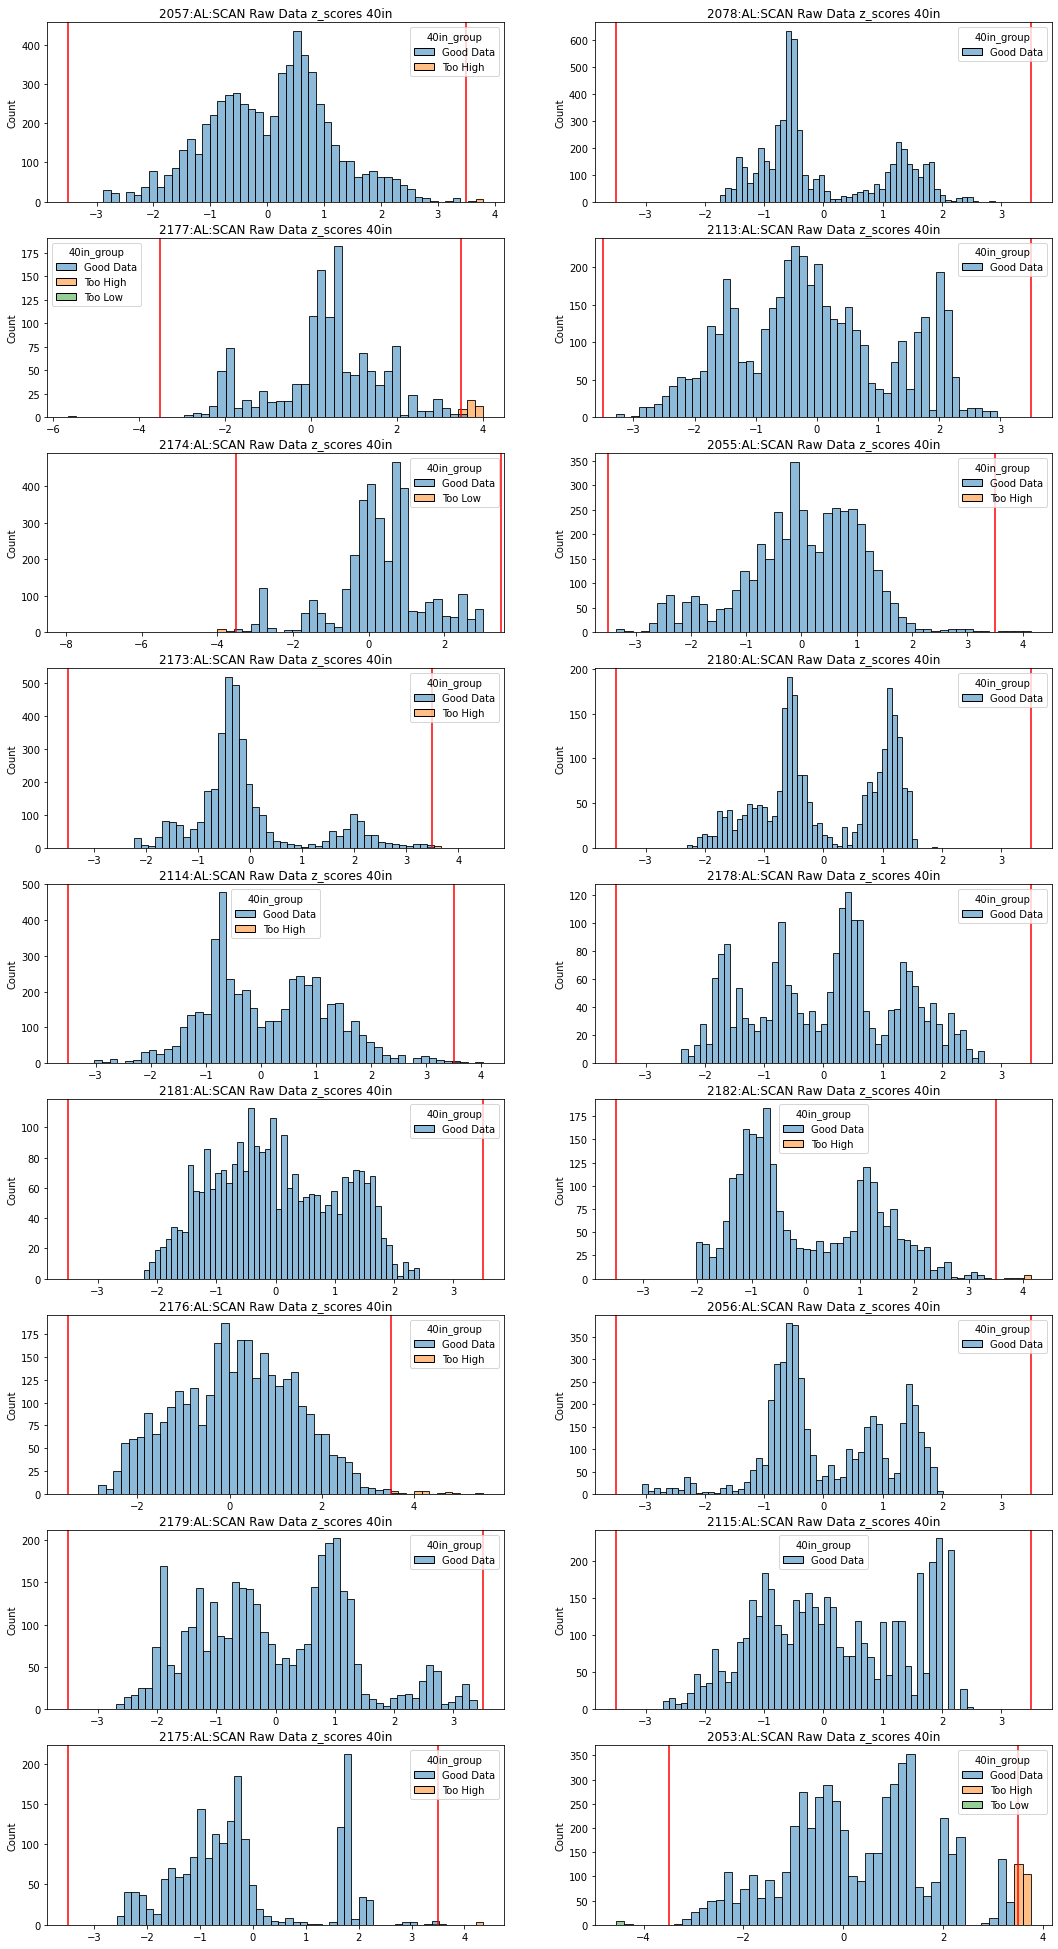

In [15]:
fig, ax = plt.subplots(9, 2, figsize=(18,35))
ax_array = ax.ravel()
for idx, key in enumerate(z_scores['station'].unique()):
    df = z_scores[z_scores['station'] == key]
    df.sort_index(inplace=True)
    zs = df[['z_40', '40in_group']]
    plot = sns.histplot(data=zs, x='z_40', ax=ax_array[idx], bins=50, hue='40in_group', legend=True)
    plot.set(xlabel=None)
    plot.set_title(f'{key}' + ' ' + 'Raw Data z_scores 40in')
    plot.axvline(x=3.5, color='red')
    plot.axvline(x=-3.5, color='red')